<a href="https://colab.research.google.com/github/adarsh-64/FIFA-Data-Analysis/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

%matplotlib inline

In [ ]:
df = pd.read_excel("/content/FIFA.xlsx")
df.head()

,Name,Age,Nationality,Overall,Club,Wage,Preferred Foot,International Reputation,Work Rate,Position,Jersey Number,Joined,Height,Finishing,SprintSpeed
0,L. Messi,31,Argentina,94,FC Barcelona,€565K,Left,5,Medium/ Medium,RF,10,"Jul 1, 2004",5'7,95,86
1,Cristiano Ronaldo,33,Portugal,94,Juventus,€405K,Right,5,High/ Low,ST,7,"Jul 10, 2018",6'2,94,91
2,Neymar Jr,26,Brazil,92,Paris Saint-Germain,€290K,Right,5,High/ Medium,LW,10,"Aug 3, 2017",5'9,87,90
3,De Gea,27,Spain,91,Manchester United,€260K,Right,4,Medium/ Medium,GK,1,"Jul 1, 2011",6'4,13,58
4,K. De Bruyne,27,Belgium,91,Manchester City,€355K,Right,4,High/ High,RCM,7,"Aug 30, 2015",5'11,82,76


In [ ]:
df.shape

(18207, 15)

In [ ]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Club', 'Wage',
       'Preferred Foot', 'International Reputation', 'Work Rate', 'Position',
       'Jersey Number', 'Joined', 'Height', 'Finishing', 'SprintSpeed'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Name                      18207 non-null  object
 1   Age                       18207 non-null  int64 
 2   Nationality               18207 non-null  object
 3   Overall                   18207 non-null  int64 
 4   Club                      17966 non-null  object
 5   Wage                      18207 non-null  object
 6   Preferred Foot            18159 non-null  object
 7   International Reputation  18207 non-null  int64 
 8   Work Rate                 18159 non-null  object
 9   Position                  18147 non-null  object
 10  Jersey Number             18207 non-null  int64 
 11  Joined                    16654 non-null  object
 12  Height                    18159 non-null  object
 13  Finishing                 18207 non-null  int64 
 14  SprintSpeed           

In [ ]:
df.describe()

,Age,Overall,International Reputation,Jersey Number,Finishing,SprintSpeed
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,25.122206,66.238699,1.110287,19.481683,45.430823,64.556324
std,4.669943,6.908930,0.397630,15.960826,19.639462,15.002398
min,16.000000,46.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,62.000000,1.000000,8.000000,30.000000,57.000000
50%,25.000000,66.000000,1.000000,17.000000,49.000000,67.000000
75%,28.000000,71.000000,1.000000,26.000000,62.000000,75.000000
max,45.000000,94.000000,5.000000,99.000000,95.000000,96.000000


In [ ]:
df.isnull().sum()

Name                           0
Age                            0
Nationality                    0
Overall                        0
Club                         241
Wage                           0
Preferred Foot                48
International Reputation       0
Work Rate                     48
Position                      60
Jersey Number                  0
Joined                      1553
Height                        48
Finishing                      0
SprintSpeed                    0
dtype: int64

In [ ]:
df = df.dropna()
df.head()

,Name,Age,Nationality,Overall,Club,Wage,Preferred Foot,International Reputation,Work Rate,Position,Jersey Number,Joined,Height,Finishing,SprintSpeed
0,L. Messi,31,Argentina,94,FC Barcelona,€565K,Left,5,Medium/ Medium,RF,10,"Jul 1, 2004",5'7,95,86
1,Cristiano Ronaldo,33,Portugal,94,Juventus,€405K,Right,5,High/ Low,ST,7,"Jul 10, 2018",6'2,94,91
2,Neymar Jr,26,Brazil,92,Paris Saint-Germain,€290K,Right,5,High/ Medium,LW,10,"Aug 3, 2017",5'9,87,90
3,De Gea,27,Spain,91,Manchester United,€260K,Right,4,Medium/ Medium,GK,1,"Jul 1, 2011",6'4,13,58
4,K. De Bruyne,27,Belgium,91,Manchester City,€355K,Right,4,High/ High,RCM,7,"Aug 30, 2015",5'11,82,76


In [ ]:
df.shape

(16654, 15)

In [ ]:
df.isnull().sum()

Name                        0
Age                         0
Nationality                 0
Overall                     0
Club                        0
Wage                        0
Preferred Foot              0
International Reputation    0
Work Rate                   0
Position                    0
Jersey Number               0
Joined                      0
Height                      0
Finishing                   0
SprintSpeed                 0
dtype: int64

In [ ]:
most_expensive = df[['Name','Wage']]
most_expensive['Wage'] = most_expensive['Wage'].str.replace('€','')
most_expensive['Wage'] = most_expensive['Wage'].str.replace('K','').astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
most_expensive = most_expensive.sort_values('Wage',ascending=False).head(10)
most_expensive

,Name,Wage
0,L. Messi,565.0
7,L. Suárez,455.0
6,L. Modrić,420.0
1,Cristiano Ronaldo,405.0
8,Sergio Ramos,380.0
11,T. Kroos,355.0
36,G. Bale,355.0
4,K. De Bruyne,355.0
5,E. Hazard,340.0
32,Coutinho,340.0


In [ ]:
fig = px.bar(most_expensive,x='Name',y='Wage',title='Most Expensive Players')
fig.show()

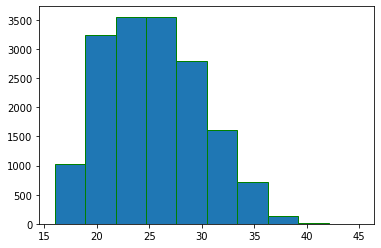

In [ ]:
plt.hist(df.Age,bins=10,edgecolor='g')
plt.show()

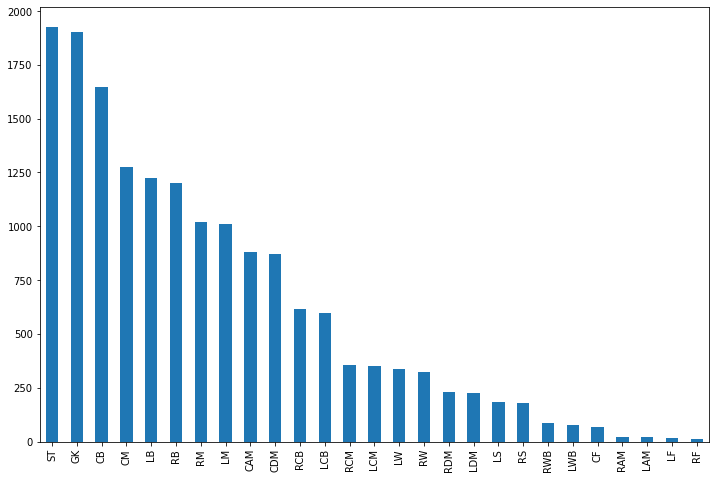

In [ ]:
plt.figure(figsize=(12,8))
df.Position.value_counts().plot(kind='bar')

In [ ]:
foot = df['Preferred Foot'].value_counts().reset_index(name='count')
foot

,index,count
0,Right,12831
1,Left,3823


In [ ]:
fig = px.pie(foot,values='count',names='index',title='Preferred Foot')
fig.show()

In [ ]:
most_expensive = most_expensive.sort_values('Value',ascending=False).head(10)
most_expensive

,Name,Value
1142,André André,9M
658,Jaume Costa,9M
1281,L. Teodorczyk,9M
1366,F. Klaus,9M
108,Pepe,9M
1878,F. Guilbert,9M
1877,A. Mawson,9M
102,Naldo,9M
1194,Alberto Moreno,9M
881,J. Tomkins,9M


In [ ]:
player_pos = df[['Name','Position']]
player_pos = player_pos['Position'].value_counts().reset_index(name='count')

In [ ]:
fig = px.pie(player_pos, values='count',names='index', title='Distribution of Positon of Players')
fig.show()

In [ ]:
top_rated = df[['Name','Overall']]
top_rated = top_rated.sort_values('Overall',ascending=False).head(10)
top_rated

,Name,Overall
0,L. Messi,94
1,Cristiano Ronaldo,94
2,Neymar Jr,92
3,De Gea,91
4,K. De Bruyne,91
5,E. Hazard,91
6,L. Modrić,91
7,L. Suárez,91
8,Sergio Ramos,91
12,D. Godín,90


In [ ]:
fig = px.bar(top_rated, x='Name',y='Overall',title='Top Rated Players')
fig.show()

In [ ]:
fig = px.histogram(df,x='Age', title='Distribution of Age of Players')
fig.show()

In [ ]:
value_rating = df[['Name','Overall','Wage','Age']]
value_rating['Wage'] = value_rating['Wage'].str.replace('€','')
value_rating['Wage'] = value_rating['Wage'].str.replace('K','').astype('float')
value_rating

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Overall,Wage,Age
0,L. Messi,94,565.0,31
1,Cristiano Ronaldo,94,405.0,33
2,Neymar Jr,92,290.0,26
3,De Gea,91,260.0,27
4,K. De Bruyne,91,355.0,27
...,...,...,...,...
18202,J. Lundstram,47,1.0,19
18203,N. Christoffersson,47,1.0,19
18204,B. Worman,47,1.0,16
18205,D. Walker-Rice,47,1.0,17


In [ ]:
fig = px.scatter(df, x='Age',y='Overall',title='Overall Rating vs. Age', trendline='ols')
fig.show()

In [ ]:
fig = px.scatter(value_rating, x='Age',y='Wage',title='Wage vs. Age', trendline='ols')
fig.show()

In [ ]:
strikers = df[df['Position'] == 'ST']

In [ ]:
fig = make_subplots(rows=2,cols=1, subplot_titles=('Overall Rating vs. Finishing','Overall Rating vs. SprintSpeed' ))
fig.add_trace(go.Scatter(x=strikers['Overall'],y=strikers['Finishing'], showlegend=False,mode='markers'),row=1,col=1)
fig.add_trace(go.Scatter(x=strikers['Overall'],y=strikers['SprintSpeed'], showlegend=False,mode='markers'),row=2,col=1)
fig.update_layout(title='Strikers: Overall Rating vs. Individual Qualities')
fig.show()

In [ ]:
xticks = ['1K', '3K', '10K','30K','100K','300K']
bins = 10 ** np.arange(3, 5.65+0.1, 0.1)

plt.figure(figsize=(10,6))
plt.hist(df['Wage'], bins=bins)
plt.xscale('log')
plt.xticks([10**3+100, 3*10**3,10**4, 3*10**4, 10**5, 3*10**5], xticks)
plt.title("Distribution of players' Wages")
plt.xlabel("Wage")
plt.ylabel("No. of players")
;

''

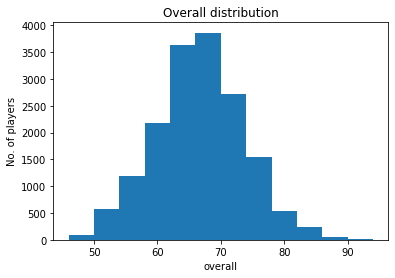

In [ ]:
b = np.arange(46, 94+4, 4)
plt.hist(df['Overall'], bins=b)
plt.title("Overall distribution")
plt.xlabel("overall")
plt.ylabel('No. of players')
;

In [ ]:
default_color = sb.color_palette()[0]

''

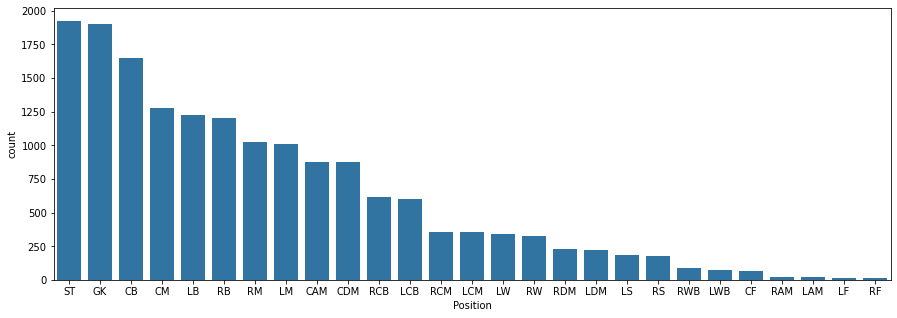

In [ ]:
plt.figure(figsize=(15,5))
position_order = df['Position'].value_counts().index
sns.countplot(data=df, x='Position', color=default_color, order=position_order)
;

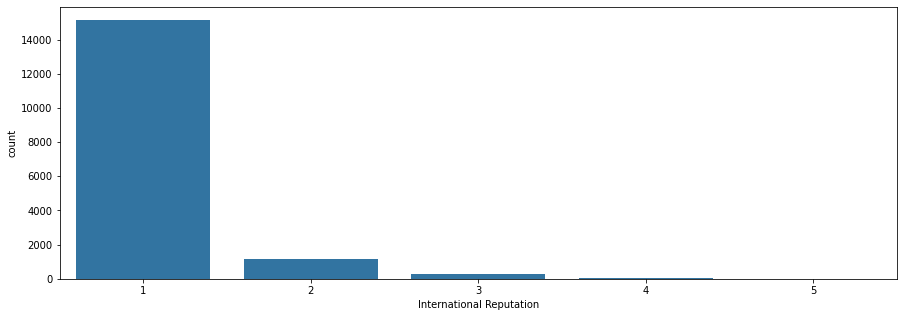

In [ ]:
plt.figure(figsize=(15,5))
position_order = df['International Reputation'].value_counts().index
sb.countplot(data=df, x='International Reputation', color=default_color, order=position_order)

''

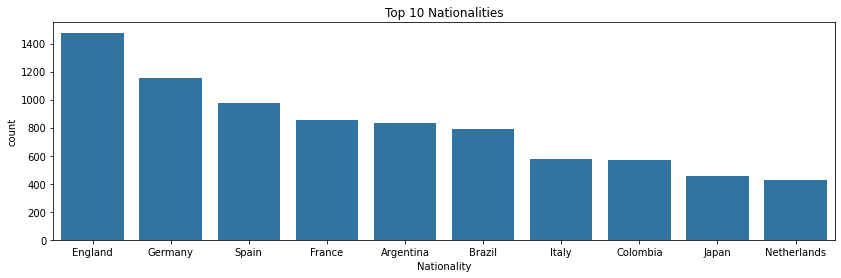

In [ ]:
top10Nationalities = df['Nationality'].value_counts().head(10).index
df2 = df.loc[df['Nationality'].isin(list(top10Nationalities))]
# Create Top 10 nationalities barplot
plt.figure(figsize=(14,4))
sb.countplot(data=df2, x='Nationality', color=default_color, order=top10Nationalities)
plt.title('Top 10 Nationalities')
;

In [ ]:
real_madrid = df[df.Club=='Real Madrid']
real_madrid

,Name,Age,Nationality,Overall,Club,Value,Preferred Foot,International Reputation,Work Rate,Position,Jersey Number,Joined,Height,Finishing,SprintSpeed
6,L. Modrić,32,Croatia,91,Real Madrid,€67M,Right,4,High/ High,RCM,10,"Aug 1, 2012",5'8,72,72
8,Sergio Ramos,32,Spain,91,Real Madrid,€51M,Right,4,High/ Medium,RCB,15,"Aug 1, 2005",6'0,60,75
11,T. Kroos,28,Germany,90,Real Madrid,€76.5M,Right,4,Medium/ Medium,LCM,8,"Jul 17, 2014",6'0,76,62
19,T. Courtois,26,Belgium,89,Real Madrid,€53.5M,Left,4,Medium/ Medium,GK,1,"Aug 9, 2018",6'6,14,52
27,Casemiro,26,Brazil,88,Real Madrid,€59.5M,Right,3,Medium/ High,CDM,14,"Jul 11, 2013",6'1,59,65
30,Isco,26,Spain,88,Real Madrid,€73.5M,Right,3,High/ Medium,LW,22,"Jul 3, 2013",5'9,79,69
35,Marcelo,30,Brazil,88,Real Madrid,€43M,Left,4,High/ Low,LB,12,"Jan 1, 2007",5'9,70,82
36,G. Bale,28,Wales,88,Real Madrid,€60M,Left,4,High/ Medium,ST,11,"Sep 2, 2013",6'1,86,95
46,K. Navas,31,Costa Rica,87,Real Madrid,€30.5M,Right,3,Medium/ Medium,GK,1,"Aug 3, 2014",6'1,15,53
62,R. Varane,25,France,86,Real Madrid,€50M,Right,3,Medium/ High,RCB,4,"Jul 1, 2011",6'3,40,85


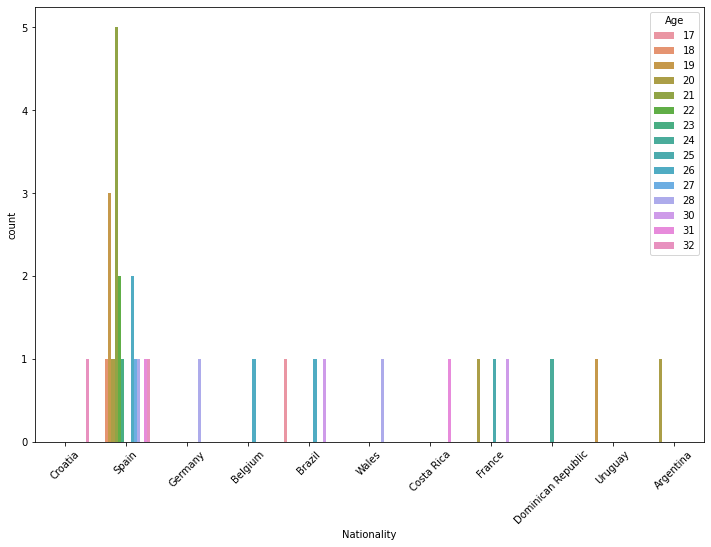

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='Nationality',data=real_madrid,hue='Age')
plt.xticks(rotation=45)
plt.show()

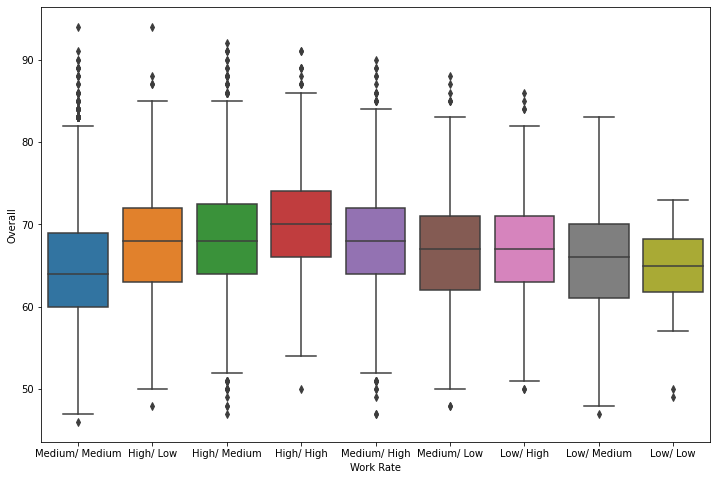

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(y='Overall',x='Work Rate',data=df)
plt.show()

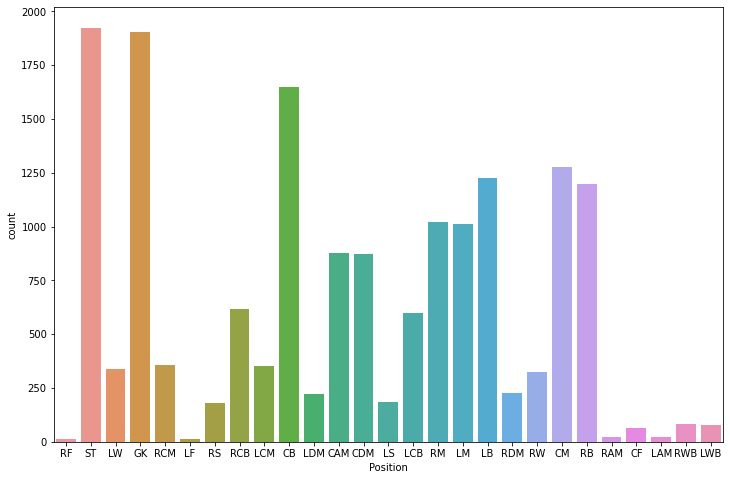

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='Position',data=df)
plt.show()

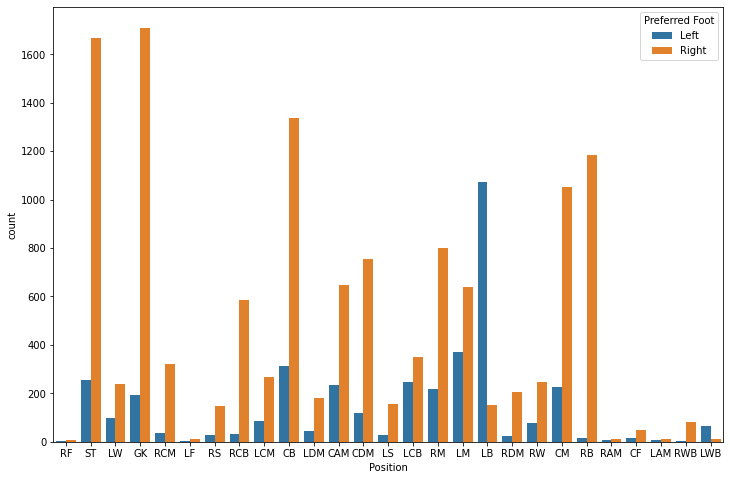

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='Position',data=df,hue='Preferred Foot')
plt.show()

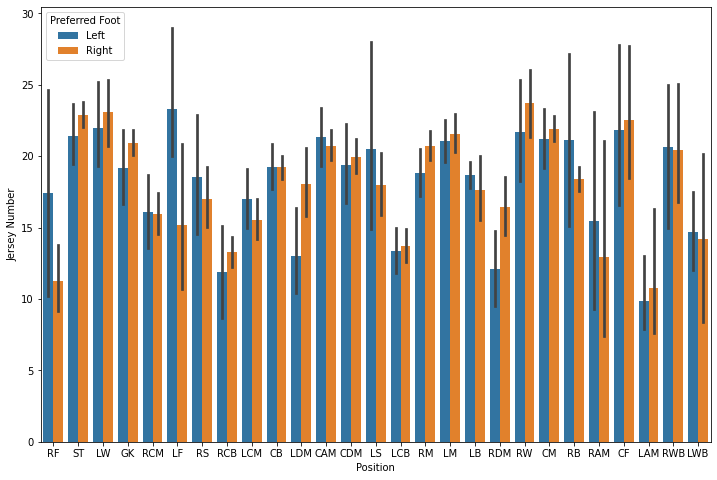

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='Position',y='Jersey Number',data=df,hue='Preferred Foot')  # that line is confidence interval
plt.show()

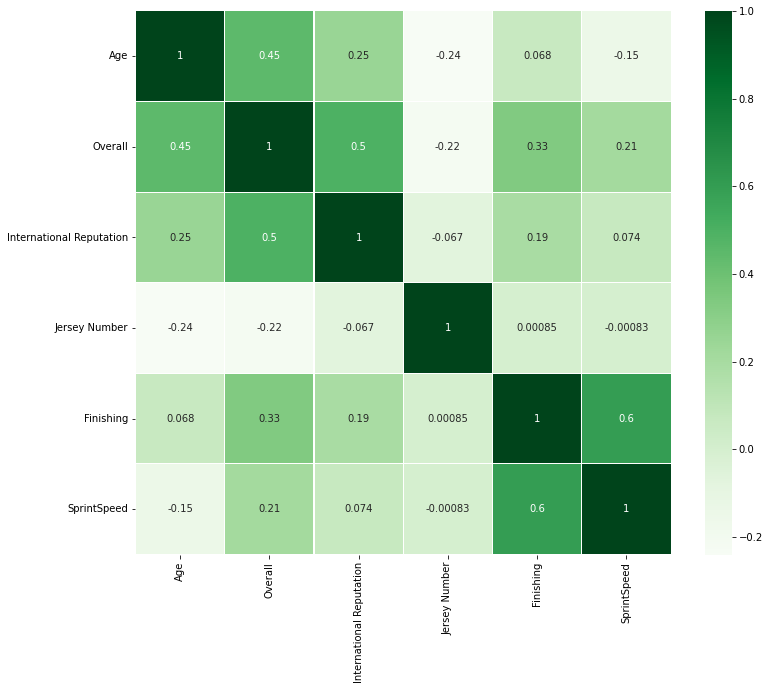

In [ ]:
corr=df.corr(method='pearson') # for getting the correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,linewidths=.1,cmap="Greens")